# Aim: The main aim of this project is to find whether a news is fake or not?

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max_colwidth',500)
df=pd.read_csv('news.csv')
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam. \nIn the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI. \nThe word “unprecedented” has been thrown around so often this election that it ought to be retired. But it’s still unprecedented for the nominee of a major political party to go war with the FBI. \nBut that’s exactly what Hillary and her people have done. Coma patients just waking ...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Political Suicide At A Trump Rally (VIDEO),"Google Pinterest Digg Linkedin Reddit Stumbleupon Print Delicious Pocket Tumblr \nThere are two fundamental truths in this world: Paul Ryan desperately wants to be president. And Paul Ryan will never be president. Today proved it. \nIn a particularly staggering example of political cowardice, Paul Ryan re-re-re-reversed course and announced that he was back on the Trump Train after all. This was an aboutface from where he was a few weeks ago. He had previously declared he would not be suppor...",FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,"U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, amid criticism that no top American officials attended Sunday’s unity march against terrorism.\n\nKerry said he expects to arrive in Paris Thursday evening, as he heads home after a week abroad. He said he will fly to France at the conclusion of a series of meetings scheduled for Thursday in Sofia, Bulgaria. He plans to meet the next day with Foreign Minister Laurent Fabius and President Francois Ho...",REAL
3,10142,Bernie supporters on Twitter erupt in anger against the DNC: 'We tried to warn you!',"— Kaydee King (@KaydeeKing) November 9, 2016 The lesson from tonight's Dem losses: Time for Democrats to start listening to the voters. Stop running the same establishment candidates. \n— People For Bernie (@People4Bernie) November 9, 2016 If Dems didn't want a tight race they shouldn't have worked against Bernie. \n— Walker Bragman (@WalkerBragman) November 9, 2016 \nNew York Times columnist Paul Krugman, who was one of Hillary Clinton’s most outspoken surrogates during the contentious Demo...",FAKE
4,875,The Battle of New York: Why This Primary Matters,"It's primary day in New York and front-runners Hillary Clinton and Donald Trump are leading in the polls.\n\nTrump is now vowing to win enough delegates to clinch the Republican nomination and prevent a contested convention. But Sens.Ted Cruz, R-Texas, Bernie Sanders, D-Vt., and Ohio Gov. John Kasich and aren't giving up just yet.\n\nA big win in New York could tip the scales for both the Republican and Democratic front-runners in this year's race for the White House. Clinton and Trump have ...",REAL


In [5]:
df.shape

(6335, 4)

In [6]:
#removing unwanted column
df.drop(columns='Unnamed: 0',axis=1,inplace=True)
df.sample()

,title,text,label
4123,Turkeys face deep divisions over Thanksgiving vote,"November 2, 2016 \nA group of about 200,000 White Holland turkeys in a gigantic shed at a farm in Ohio is now debating whether or not to vote in favour of Thanksgiving. The vote to be made next week by pecking once at a pile of grain for ‘Thanksgiving’ or twice for ‘Something Else’ comes after bitter arguments in which claims and counter-claims were made about the availability of dust for bathing in over the turkeys’ long-term (i.e. three-week) future. \nMany turkeys have deplored the result...",FAKE


In [7]:
#Checking the missing values
df.isnull().sum()

title    0
text     0
label    0
dtype: int64

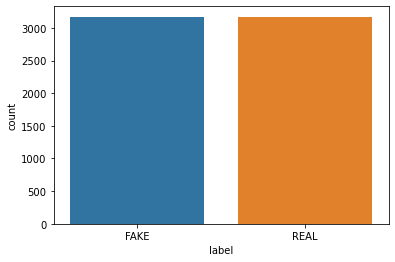

In [8]:
#Checking dataset is balanced or imbalanced(creating a countplot to visualize it)
sns.countplot(df['label'])

- Here, we can see that our dataset is balanced dataset.

In [9]:
#Finding the count of each unique values available in label featurd
df['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [10]:
#Removing Punctuations
df.replace("[^a-zA-Z]"," ",regex=True, inplace=True)
df.sample()

,title,text,label
1613,Defense Bill Would Put Untraceable Guns On Streets,That may soon be possible thanks to a provision tacked onto this year s National Defense Authorization Act which the House of Representatives is set to pass this week The provision was added as an amendment during a late night session at the end of last month during which the legislation authorizing the nation s military activities for was drafted According to a white paper prepared for Congress by the Army opposing the amendment the measure would allow the unregulated distributio...,REAL


In [11]:
#converting into lowercase
for index in df.columns:
    df[index]=df[index].str.lower()
df.sample()    

,title,text,label
458,war on drugs heading in wrong direction,license dmca my guest today is maya schenwar truthout s editor in chief author of locked down locked out why prison doesn t work and how we can do better and co editor of who do you serve who do you protect police violence and resistance in the united states joan brunwasser welcome back to opednews maya we last spoke back in january now i d like to discuss your recent piece death penalty for heroin dealers more proof the drug war is not over who thought the drug war ...,fake


In [12]:
#combining all the texts together
analyze=[]
for row in range(0,len(df.index)):
    analyze.append(" ".join(str(x) for x in df.iloc[row,0:]))
analyze[2623]    

'kamala harris announces u s  senate bid los angeles  cnn  hours after california attorney general kamala harris began raising money for a bid to replace barbara boxer in the u s  senate  billionaire environmentalist tom steyer outlined the case for his own run tuesday and said he would decide soon    setting up the likelihood of an exorbitantly expensive contest that could have two democrats facing off in november of        california s two senate seats have been locked down by boxer and u s  sen  dianne feinstein since       closing off statewide opportunities for the next generation of politicians   under california s new top two primary system  the top two candidates in the first round will advance to the general election  regardless of their party   in a column on the huffington post website  steyer said he was intrigued by the opportunity of taking on interests in washington that  oppose recognizing global warming and fight against the rights and futures of average americans     

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
Tfid_vect=TfidfVectorizer()
df_feature=Tfid_vect.fit_transform(analyze)

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [16]:
#Applying Naive-Bayes Algorithm for model creation/classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df_feature,df.label,test_size=0.2,random_state=0)
nb_clf=RandomForestClassifier()
nb_clf.fit(x_train.toarray(),y_train)

RandomForestClassifier()

In [17]:
#Checking the accuracy
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
prediction=nb_clf.predict(x_test.toarray())
print("accuracy:",accuracy_score(prediction,y_test))
print('confusion matrix:',confusion_matrix(prediction,y_test))
print('classification report:',classification_report(prediction,y_test))

accuracy: 0.9613259668508287
confusion matrix: [[582  16]
 [ 33 636]]
classification report:               precision    recall  f1-score   support

        fake       0.95      0.97      0.96       598
        real       0.98      0.95      0.96       669

    accuracy                           0.96      1267
   macro avg       0.96      0.96      0.96      1267
weighted avg       0.96      0.96      0.96      1267



- Here, we can see that we are getting the accuracy of 96.13 %